## Using Machine Learning to Predict If A Customers Will Purchase In The Next 90 Days And How Much They Will spend ? 
Machine Learning model to predict whether customers will make their next purchase after a certain period.If there is one major lesson that those in the retail business have learnt from the SARS-CoV-2 pandemic, it is the demand to switch to doing business via the Internet, i.e., e-commerce. The idea of e-commerce assists those in managerial positions to make decisions for the progress of their companies. Undoubtedly, most of these decisions are influenced by the results derived from studying the purchasing behavioural data of online customers by experts in data analysis, data science, and machine learning.

## Problem Statement
 the managerial team of an online retail shop approaches you, a data scientist, with the dataset wanting to know whether customers will make their next purchase 90 days from the day they made their last purchase. Your answer to their inquiry will help them identify which customers their marketing team need to have a focus on with regard to the next promotional offers they will be rolling out.

In [4]:
## load tools

# avoid displaying warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,classification_report
from sklearn.cluster import KMeans
import xgboost as xgb
import math
plt.style.use('seaborn-v0_8-whitegrid')

In [5]:
## load data

purchase_df = pd.read_csv('C:/Users/user/Data_Driven/online_retail_II.csv')
purchase_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
# changing invoice , price and Customer ID to invoiceID,unitprice and customerID
purchase_df.rename(columns = {
    'Invoice' : 'InvoiceID',
    'Price' : 'UnitPrice',
    'Customer ID' : 'CustomerID'
},inplace = True)

purchase_df

,InvoiceID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
# checking information about data
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   InvoiceID    1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   UnitPrice    1067371 non-null  float64
 6   CustomerID   824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


* Description,CustomerID are likely to have null values and InvoiceDate has to change to the proper data type which is datetime

In [8]:
# checking for missing values

purchase_df.isnull().sum()

InvoiceID           0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     243007
Country             0
dtype: int64

* Notice as earlier stated Description and CostomerID have some missing values in them and must be dealt with.
* Dropping all missing values since they are considereably same compared to th whole data

In [9]:
purchase_df.dropna(inplace = True)
purchase_df.head()

,InvoiceID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
purchase_df.isnull().sum()

InvoiceID      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
# converting InvoiceDate to datetime object
purchase_df['InvoiceDate'] = pd.to_datetime(purchase_df['InvoiceDate'])

In [12]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceID    824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   UnitPrice    824364 non-null  float64       
 6   CustomerID   824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


In [13]:
pd.DataFrame(purchase_df['InvoiceDate'].describe())

,InvoiceDate
count,824364
unique,41439
top,2011-11-14 15:27:00
freq,543
first,2009-12-01 07:45:00
last,2011-12-09 12:50:00


* Looking at the dataframe above ,  we can notice that onlice purchases made by customers starts from 2009-12-01 to 2011-12-09

## Exploratory Data  Analysis (EDA)

In [14]:
# number of customers
print(f'The total number of online customers : {len(purchase_df.CustomerID.unique())} customers ')

The total number of online customers : 5942 customers 


In [15]:
# number of countries
print(f'The total countries each customer is situated : {len(purchase_df.Country.unique())} countries ')

The total countries each customer is situated : 41 countries 


* __What countries are represented most in the dataset:__

In [16]:
cus_cntry_df =  purchase_df.groupby(['CustomerID', 'Country']).count().reset_index()
cus_cntry_df = cus_cntry_df.groupby('Country')['CustomerID'].count().reset_index().sort_values(
    by=['CustomerID'], ascending=False)

# Create a new column, Percentage to calculate the customer representation in percentage
cus_cntry_df['Percentage']= np.round(cus_cntry_df.CustomerID / cus_cntry_df.CustomerID.sum() * 100, 2)

cus_cntry_df.head(10)

,Country,CustomerID,Percentage
38,United Kingdom,5410,90.85
14,Germany,107,1.80
13,France,95,1.60
32,Spain,41,0.69
3,Belgium,29,0.49
28,Portugal,24,0.40
24,Netherlands,23,0.39
34,Switzerland,22,0.37
33,Sweden,19,0.32
18,Italy,17,0.29


In [17]:
percent_margin = 0.25
cus_cntry_df['CountryCategory'] = cus_cntry_df['Country']
# Set Countries with Percentage less than or equal to percent_margin to 'Other Countries'

cus_cntry_df.loc[cus_cntry_df.Percentage <= percent_margin, 'CountryCategory'] = 'Other Countries'

cus_cntry_df.head(11)

,Country,CustomerID,Percentage,CountryCategory
38,United Kingdom,5410,90.85,United Kingdom
14,Germany,107,1.80,Germany
13,France,95,1.60,France
32,Spain,41,0.69,Spain
3,Belgium,29,0.49,Belgium
28,Portugal,24,0.40,Portugal
24,Netherlands,23,0.39,Netherlands
34,Switzerland,22,0.37,Switzerland
33,Sweden,19,0.32,Sweden
18,Italy,17,0.29,Italy


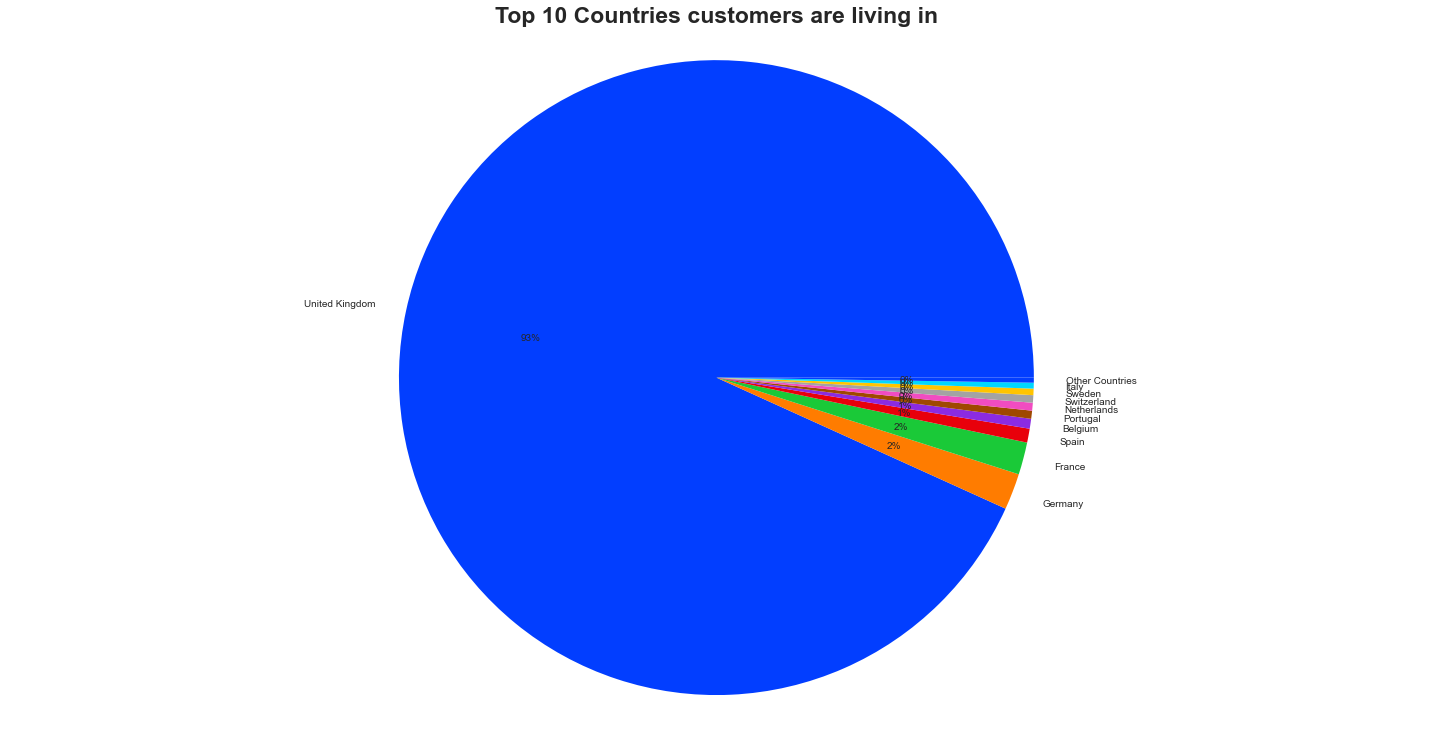

In [18]:
# plot on how each countries are represented
plt.figure(figsize = (20,10))
country =cus_cntry_df['Percentage'][:11]
label = cus_cntry_df['CountryCategory'][:11]

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
plt.pie(country,labels = label,colors = palette_color,autopct='%.0f%%')
plt.axis('equal')  
plt.tight_layout()
plt.title('Top 10 Countries customers are living in',fontweight = 'bold',fontsize = 23);

**A far majority of online customers live in the United Kingdom which 92% ratio**

* __Calculate the revenue that was made in each month and what is the percentage revenue based on countries?__

In [19]:
purchase_df['Revenue'] = purchase_df['UnitPrice'] * purchase_df['Quantity']
purchase_df.head()

,InvoiceID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [20]:
cus_revenue = purchase_df[['InvoiceDate','Revenue']]
cus_revenue.index = pd.to_datetime(cus_revenue['InvoiceDate'])
cus_revenue = cus_revenue.resample('M').sum()
cus_revenue.head()

,Revenue
InvoiceDate,
2009-12-31,663272.050
2010-01-31,531952.902
2010-02-28,489399.586
2010-03-31,635996.481
2010-04-30,560635.022


In [21]:
cus_revenue.describe()

,Revenue
count,2.500000e+01
mean,6.659317e+05
std,2.154966e+05
min,3.425244e+05
25%,5.599246e+05
50%,5.872565e+05
75%,7.810333e+05
max,1.134879e+06


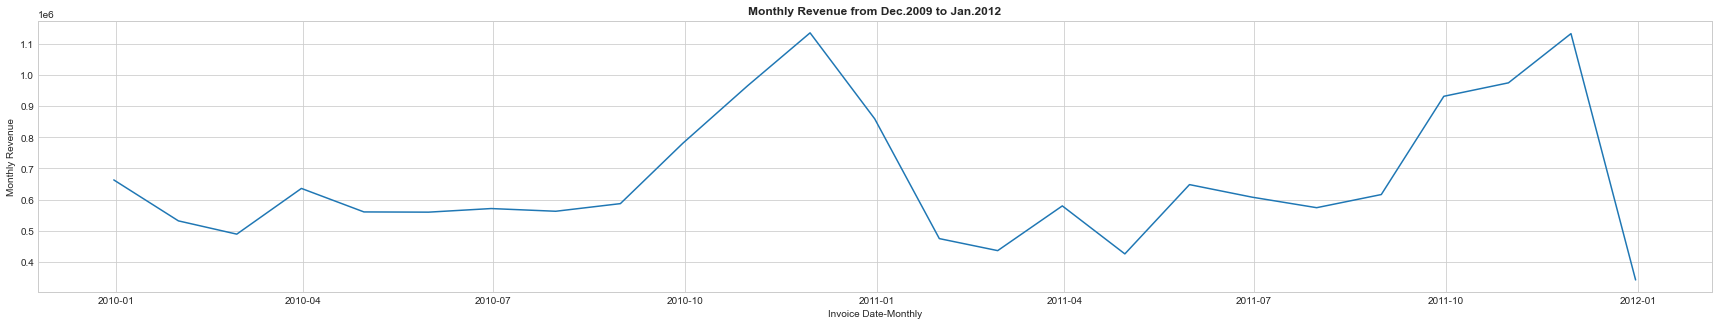

In [22]:
plt.figure(figsize = (30,5))
sns.lineplot(data = cus_revenue,y='Revenue',x=cus_revenue.index)
plt.title('Monthly Revenue from Dec.2009 to Jan.2012',fontweight = 'bold')
plt.xlabel('Invoice Date-Monthly')
plt.ylabel('Monthly Revenue');

**Here, one can observe that the company recorded its highest revenue in the month of November 2010, followed by November 2011. In addition, there is a rise in monthly revenue after August.**

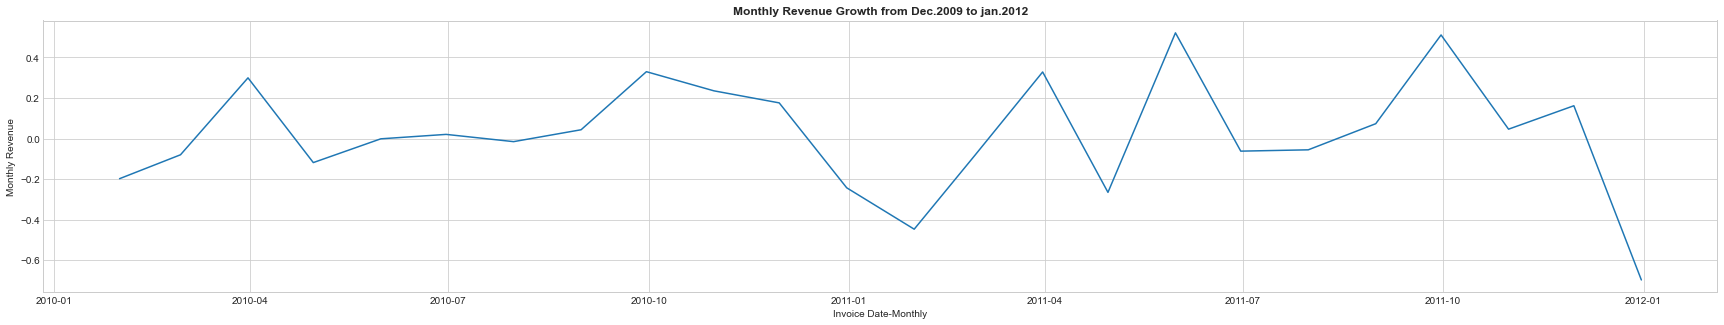

In [23]:

cus_revenue['MonthlyGrowth'] = cus_revenue['Revenue'].pct_change()
plt.figure(figsize = (30,5))
plt.plot(cus_revenue.index,cus_revenue['MonthlyGrowth'])
plt.title('Monthly Revenue Growth from Dec.2009 to jan.2012',fontweight = 'bold')
plt.xlabel('Invoice Date-Monthly')
plt.ylabel('Monthly Revenue');

__we experience monthly growth peak around three periods in a year which are, January, March and August and then experience downdard trend around Decemeber and April__

## Monthly Active Customers

In [24]:
cus_monthly_active = (purchase_df[['CustomerID','InvoiceDate']])
cus_monthly_active = cus_monthly_active.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['CustomerID'].nunique().reset_index()
cus_monthly_active

,InvoiceDate,CustomerID
0,2009-12-31,1045
1,2010-01-31,786
2,2010-02-28,807
3,2010-03-31,1111
4,2010-04-30,998
5,2010-05-31,1062
6,2010-06-30,1095
7,2010-07-31,988
8,2010-08-31,964
9,2010-09-30,1202


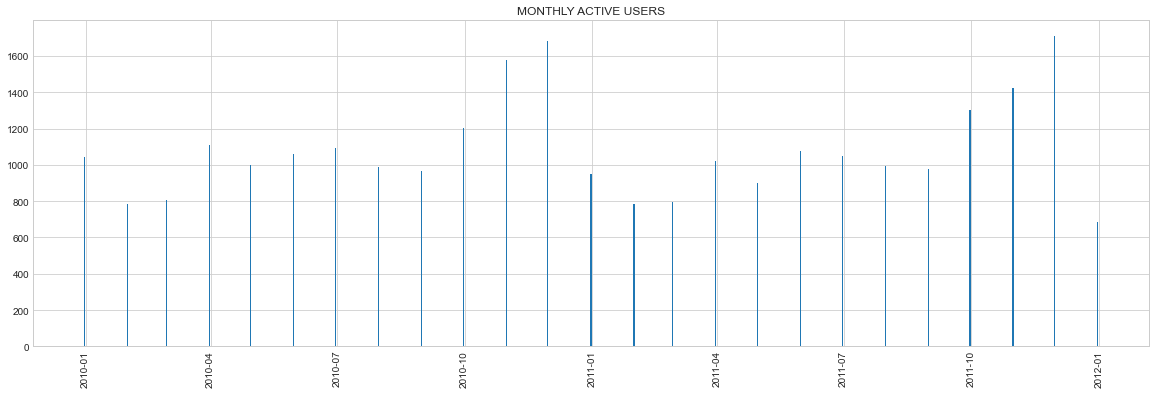

In [25]:
plt.figure(figsize=(20,6))
plt.bar(cus_monthly_active['InvoiceDate'],cus_monthly_active['CustomerID'])
plt.title('MONTHLY ACTIVE USERS')
plt.xticks(rotation =90);

__More active users around August,Octoberand November__

## Monthly Order Count

In [26]:

#create a new dataframe for no. of order by using quantity field
cus_monthly_order = (purchase_df[['InvoiceDate','Quantity']])
cus_monthly_order = cus_monthly_order.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Quantity'].sum().reset_index()
cus_monthly_order.head()

,InvoiceDate,Quantity
0,2009-12-31,390286
1,2010-01-31,367141
2,2010-02-28,366317
3,2010-03-31,499030
4,2010-04-30,345590


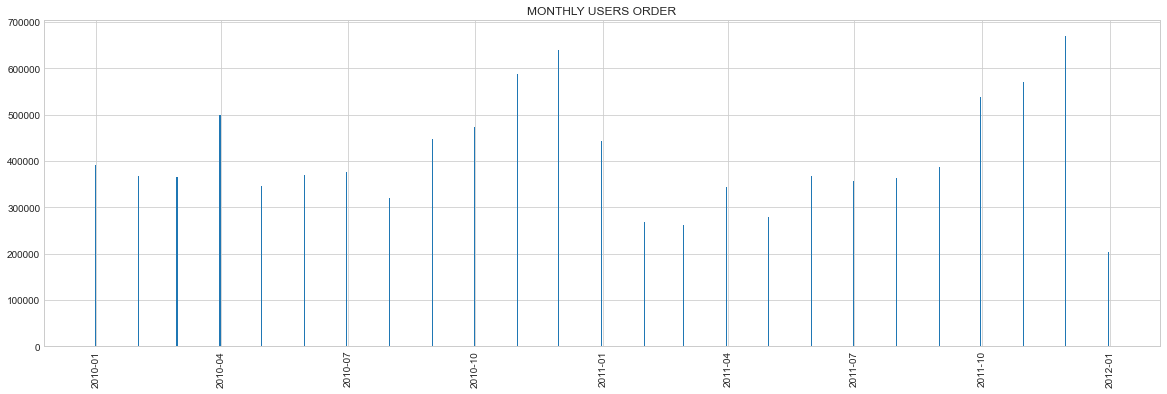

In [27]:
plt.figure(figsize=(20,6))
plt.bar(cus_monthly_order['InvoiceDate'],cus_monthly_order['Quantity'])
plt.title('MONTHLY USERS ORDER')
plt.xticks(rotation =90);

__As expected a decrease in April and December, We know that Active Customer Count directly affected Order Count decrease.__

## Average Revenue per Order

In [28]:
cus_monthly_order_rev = (purchase_df[['InvoiceDate','Revenue']])
cus_monthly_order_rev = cus_monthly_order_rev.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Revenue'].mean().reset_index()
cus_monthly_order_rev.head()

,InvoiceDate,Revenue
0,2009-12-31,20.883881
1,2010-01-31,23.706622
2,2010-02-28,20.471831
3,2010-03-31,19.206272
4,2010-04-30,20.142817


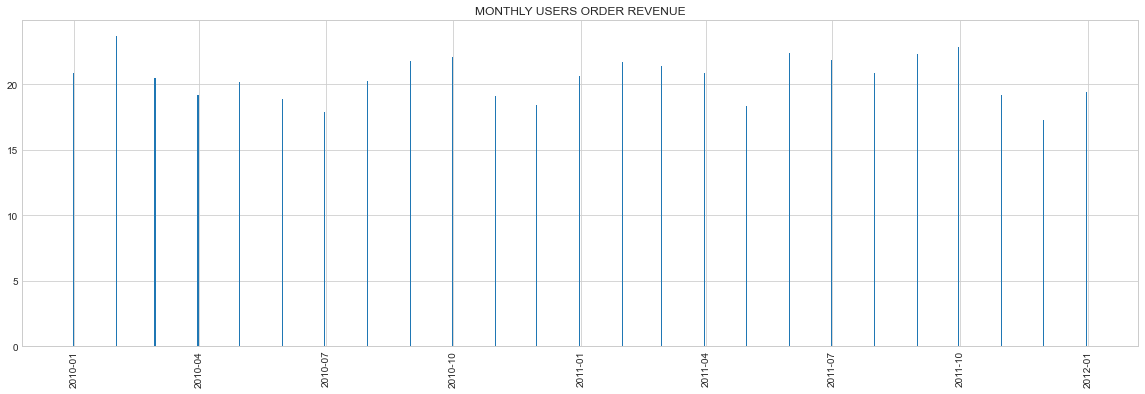

In [29]:
plt.figure(figsize=(20,6))
plt.bar(cus_monthly_order_rev['InvoiceDate'],cus_monthly_order_rev['Revenue'])
plt.title('MONTHLY USERS ORDER REVENUE')
plt.xticks(rotation =90);

### Next, explore the percentage revenue generated by the retail shop based on the countries their customers reside

In [30]:
cntry_revenue_df = purchase_df.groupby(['Country'])['Revenue'].sum().reset_index().sort_values(by=['Revenue'], 
                                                                                        ascending=False)

cntry_revenue_df['Percentage'] = np.round(cntry_revenue_df.Revenue / cntry_revenue_df.Revenue.sum() * 100, 2)

cntry_revenue_df.head(5)

,Country,Revenue,Percentage
38,United Kingdom,1.380642e+07,82.93
10,EIRE,5.785016e+05,3.47
24,Netherlands,5.485249e+05,3.29
14,Germany,4.179886e+05,2.51
13,France,3.265047e+05,1.96


From the output above, the top 5 countries with respect to revenue generated are:

* The United Kingdom
* The Republic of Ireland (EIRE)
* The Netherlands
* Germany
* France
with the United Kingdom recording the highest in percentage(83)

In [31]:
## group countries with revenue percentage value less than or equal to 0.25 together and then plot a pie chart.
percent_margin = 0.25

# Create a new column, CountryCategory and set values to the corresponding values of the Country column
cntry_revenue_df['CountryCategory'] = cntry_revenue_df.Country

# Set Countries with Percentage less than or equal to percent_margin to 'Other Countries'

cntry_revenue_df.loc[cntry_revenue_df.Percentage <= percent_margin, 'CountryCategory'] = 'Other Countries'

cntry_revenue_df.head(11)

,Country,Revenue,Percentage,CountryCategory
38,United Kingdom,1.380642e+07,82.93,United Kingdom
10,EIRE,5.785016e+05,3.47,EIRE
24,Netherlands,5.485249e+05,3.29,Netherlands
14,Germany,4.179886e+05,2.51,Germany
13,France,3.265047e+05,1.96,France
0,Australia,1.671291e+05,1.00,Australia
34,Switzerland,9.908281e+04,0.60,Switzerland
32,Spain,9.185948e+04,0.55,Spain
33,Sweden,8.745542e+04,0.53,Sweden
9,Denmark,6.574109e+04,0.39,Denmark


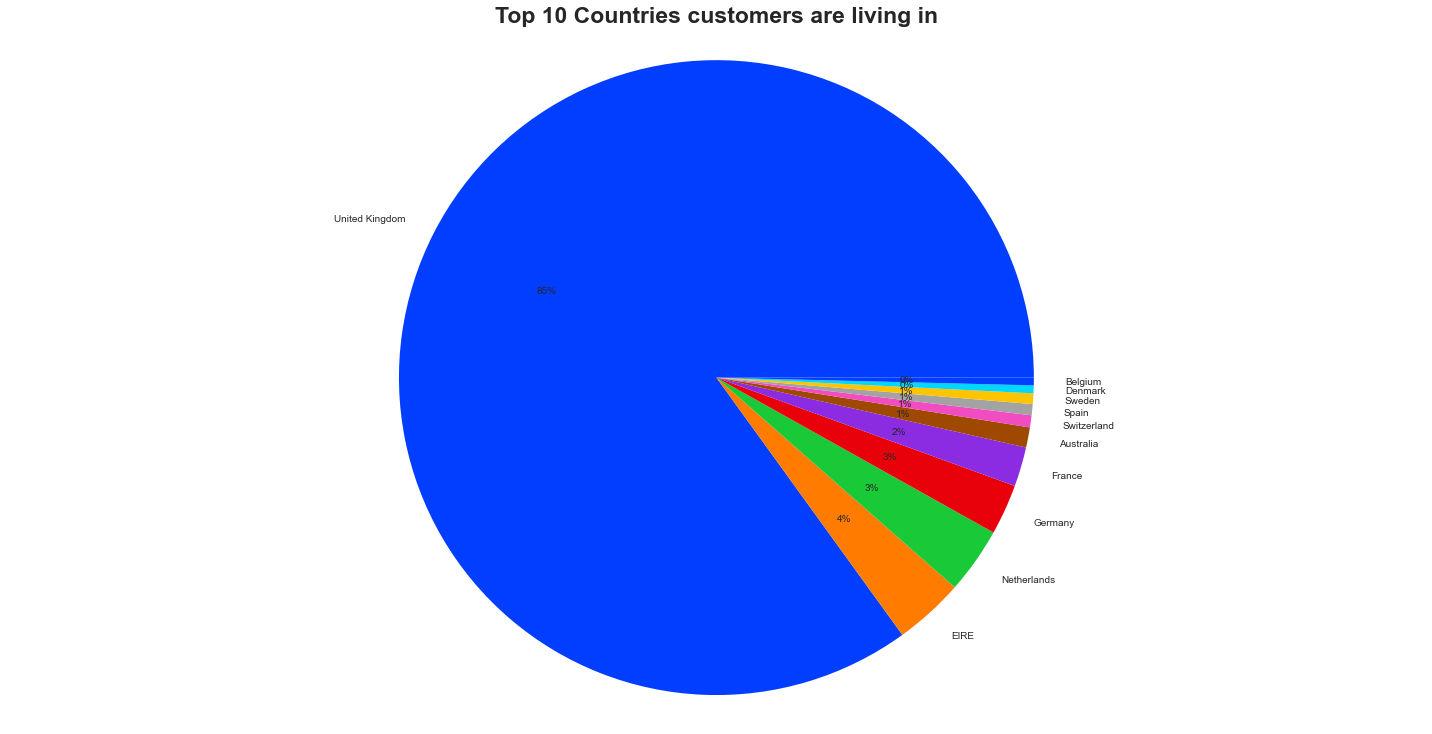

In [32]:
# countrues based revenue
plt.figure(figsize = (20,10))
country =cntry_revenue_df['Percentage'][:11]
label = cntry_revenue_df['CountryCategory'][:11]

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
plt.pie(country,labels = label,colors = palette_color,autopct='%.0f%%')
plt.axis('equal')  
plt.tight_layout()
plt.title('Top 10 Countries customers are living in',fontweight = 'bold',fontsize = 23);

**With such a huge customer base in the United Kingdom, it is not surprising that 83% of the company’s revenue came from the United Kingdom.**

In [33]:
# highest selling product

high_sell_product = pd.DataFrame(purchase_df.groupby('Description')['Revenue'].sum().sort_values(ascending=False))

high_sell_product[:10]

,Revenue
Description,
REGENCY CAKESTAND 3 TIER,269736.70
WHITE HANGING HEART T-LIGHT HOLDER,242700.51
JUMBO BAG RED RETROSPOT,134845.16
ASSORTED COLOUR BIRD ORNAMENT,126354.18
POSTAGE,112249.10
PARTY BUNTING,102686.23
PAPER CHAIN KIT 50'S CHRISTMAS,78366.93
CHILLI LIGHTS,72229.34
BLACK RECORD COVER FRAME,67127.15


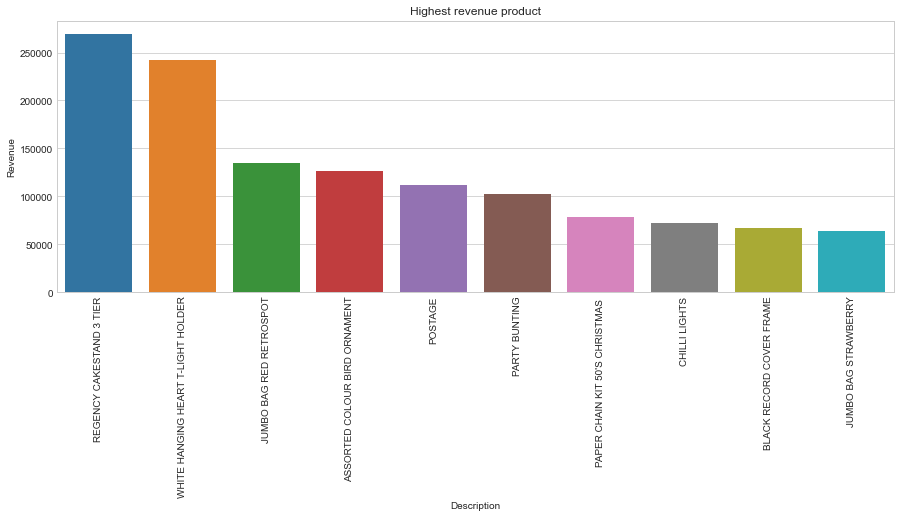

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(data = high_sell_product[:10],y='Revenue',x=high_sell_product[:10].index)
plt.title('Highest revenue product')
plt.xticks(rotation = 90);

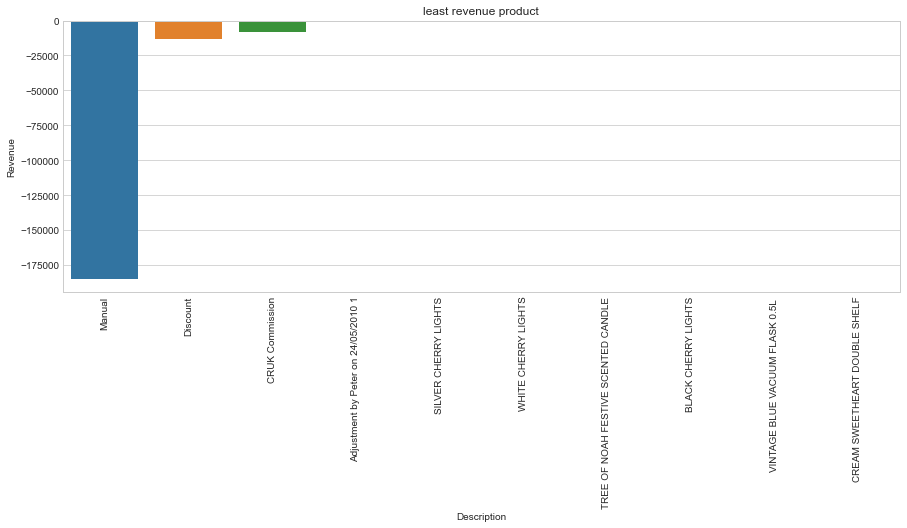

In [35]:
# least selling product

least_sell_product = pd.DataFrame(purchase_df.groupby('Description')['Revenue'].sum().sort_values(ascending=True))

least_sell_product[:10]

plt.figure(figsize=(15,5))
sns.barplot(data = least_sell_product[:10],y='Revenue',x=least_sell_product[:10].index)
plt.title('least revenue product')
plt.xticks(rotation = 90);

## Observation :
* Some product gave negative revenue, and i feel that made because they were returned so no revenue was generated from them

## Predicting customer's purchase

The goal of this section is to come up with a make a model using the given dataframe df_data, to estimate if a given customer will buy something again from the online shop in the next quarter.

Splitting the dataframe into two sub-dataframe :
* The first dataframe contains the last purchase of the customers from 01–12–2009 to 30–08–2011. This dataset gives the last purchase of all the online customers.This dataframe will be used to study the behavioural purchases of the online customers.


* The second dataframe contains the first purchase of the customers from  01–09–2011 to 9–12–2011 to get thier first purchase,will be used to study the behavioural purchases of the customers in the next quarter.


In [36]:
purchase_df

,InvoiceID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [37]:
# Creating cohort analysis
cus_past_df = purchase_df[(purchase_df['InvoiceDate'] >= pd.Timestamp(2009,12,1)) & (purchase_df['InvoiceDate'] < 
                                                                                    pd.Timestamp(2011,9,1))].reset_index(drop=True)

cus_next_quarter = purchase_df[(purchase_df['InvoiceDate'] >= pd.Timestamp(2011,9,1)) & (purchase_df['InvoiceDate'] < 
                                                                                    pd.Timestamp(2011,12,9))].reset_index(drop=True)

In [38]:
cus_past_df['InvoiceDate'].min(),cus_past_df['InvoiceDate'].max(),cus_next_quarter['InvoiceDate'].min(),cus_next_quarter['InvoiceDate'].max()

(Timestamp('2009-12-01 07:45:00'),
 Timestamp('2011-08-31 17:45:00'),
 Timestamp('2011-09-01 08:25:00'),
 Timestamp('2011-12-08 20:01:00'))

In [39]:
# get the distinst customers in cus_past_df
cus_df = pd.DataFrame(cus_past_df['CustomerID'].unique())
cus_df.columns = ['CustomerID']

In [40]:
cus_df.head()

,CustomerID
0,13085.0
1,13078.0
2,15362.0
3,18102.0
4,12682.0


Let's find the first purchase made by each customer in the next quarter.

In [41]:
# Create a dataframe with CustomerID and customers first purchase 
# date in cus_next_quarter

cus_1st_purchase_in_next_quarter = cus_next_quarter.groupby('CustomerID')['InvoiceDate'].min().reset_index()
cus_1st_purchase_in_next_quarter.columns = ['CustomerID','FirstPurchaseDate']
cus_1st_purchase_in_next_quarter.head()

,CustomerID,FirstPurchaseDate
0,12347.0,2011-10-31 12:25:00
1,12348.0,2011-09-25 13:13:00
2,12349.0,2011-11-21 09:51:00
3,12352.0,2011-09-20 14:34:00
4,12356.0,2011-11-17 08:40:00


Let's find the last purchase made by each customer in the dataframe `cus_past_df`

In [42]:
cus_last_purchase_past_df = cus_past_df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
cus_last_purchase_past_df.columns = ['CustomerID','LastPurchaseDate']
cus_last_purchase_past_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-08-02 08:48:00
2,12348.0,2011-04-05 10:47:00
3,12349.0,2010-10-28 08:23:00
4,12350.0,2011-02-02 16:01:00


In [43]:
# Merge two dataframes cus_last_purchase_past_df and cus_1st_purchase_in_next_quarter
cus_purchase_dates = pd.merge(cus_last_purchase_past_df,cus_1st_purchase_in_next_quarter,on='CustomerID',how = 'left')
cus_purchase_dates.head()

,CustomerID,LastPurchaseDate,FirstPurchaseDate
0,12346.0,2011-01-18 10:17:00,NaT
1,12347.0,2011-08-02 08:48:00,2011-10-31 12:25:00
2,12348.0,2011-04-05 10:47:00,2011-09-25 13:13:00
3,12349.0,2010-10-28 08:23:00,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00,NaT


Let's calculate the time difference in days between customer's last purchase in the dataframe `cus_last_purchase_past_df` and the first purchase in the dataframe `cus_1st_purchase_in_next_quarter`.

In [44]:
cus_purchase_dates['NextPurchaseDay'] = (cus_purchase_dates['FirstPurchaseDate'] - cus_purchase_dates['LastPurchaseDate']).dt.days
cus_purchase_dates.head()

,CustomerID,LastPurchaseDate,FirstPurchaseDate,NextPurchaseDay
0,12346.0,2011-01-18 10:17:00,NaT,NaN
1,12347.0,2011-08-02 08:48:00,2011-10-31 12:25:00,90.0
2,12348.0,2011-04-05 10:47:00,2011-09-25 13:13:00,173.0
3,12349.0,2010-10-28 08:23:00,2011-11-21 09:51:00,389.0
4,12350.0,2011-02-02 16:01:00,NaT,NaN


In [45]:
# merge with cus_df

cus_df = pd.merge(cus_df,cus_purchase_dates[['CustomerID','NextPurchaseDay']],on='CustomerID',how='left')

cus_df.head()

,CustomerID,NextPurchaseDay
0,13085.0,NaN
1,13078.0,13.0
2,15362.0,NaN
3,18102.0,27.0
4,12682.0,15.0


In [46]:
# updating missing values with 9999 assuming they take along time to purchase sometime

cus_df.fillna(9999,inplace=True)
cus_df.head()

,CustomerID,NextPurchaseDay
0,13085.0,9999.0
1,13078.0,13.0
2,15362.0,9999.0
3,18102.0,27.0
4,12682.0,15.0


Next, we will define some features and add them to the dataframe ctm_dt to build our machine learning model. We will use the Recency - Frequency - Monetary Value segmentation method. That is, we will put the customers into groups based on the following:

* __Recency:__ Customers purchase behaviour based on their most recent purchase date and how many days they have been inactive since their last purchase.

* __Frequency:__ Customers purchase behaviour based on the number of times they buy from the online retail shop.

* __Monetary Value/Revenue:__ Customers purchase behaviour based the revenue they generate.

After we will apply K-means clustering to assign customers a score to each of the features.


## Recency
find the most recent purchase date of each customer and see how many days they have been inactive. Afterwards, we can apply K-means clustering to assign customers a recency score.`

In [47]:
cus_max_purchase = cus_past_df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
cus_max_purchase.columns = ['CustomerID','LastPurchaseDate']
cus_max_purchase.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-08-02 08:48:00
2,12348.0,2011-04-05 10:47:00
3,12349.0,2010-10-28 08:23:00
4,12350.0,2011-02-02 16:01:00


In [48]:
cus_max_purchase['Recency'] = (cus_max_purchase['LastPurchaseDate'].max()-cus_max_purchase['LastPurchaseDate']).dt.days

cus_df = pd.merge(cus_df,cus_max_purchase[['CustomerID','Recency']],on='CustomerID')

cus_df.head()

,CustomerID,NextPurchaseDay,Recency
0,13085.0,9999.0,57
1,13078.0,13.0,0
2,15362.0,9999.0,348
3,18102.0,27.0,26
4,12682.0,15.0,0


In [49]:
pd.DataFrame(cus_df['Recency'].describe())

,Recency
count,5314.000000
mean,204.675574
std,173.569622
min,0.000000
25%,48.000000
50%,161.000000
75%,320.000000
max,638.000000


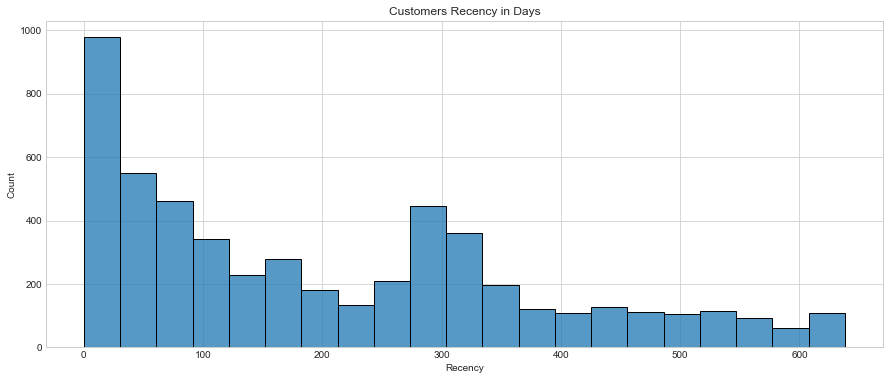

In [50]:
plt.figure(figsize = (15,6))
sns.histplot(x='Recency',data=cus_df)
plt.title("Customers Recency in Days");

Next we will apply K-means clustering to assign a recency score. However, we need to know how many clusters in order to use the K-means algorithm. 

<AxesSubplot: >

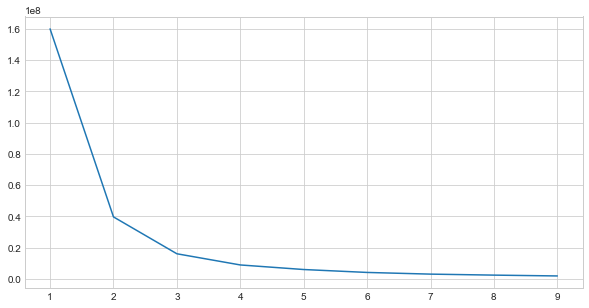

In [51]:
my_dict={}
cus_recency = cus_df[['Recency']]
for idx in range(1, 10):
    kmeans = KMeans(n_clusters=idx, max_iter=1000).fit(cus_recency)
    cus_recency["clusters"] = kmeans.labels_
    my_dict[idx] = kmeans.inertia_ 
    
plt.figure(figsize=(10,5))
sns.lineplot(x=list(my_dict.keys()),y=list(my_dict.values()))

In [52]:
number_of_clusters = 4
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(cus_df[['Recency']])
cus_df['RecencyCluster'] = kmeans.predict(cus_df[['Recency']])
cus_df.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster
0,13085.0,9999.0,57,2
1,13078.0,13.0,0,2
2,15362.0,9999.0,348,3
3,18102.0,27.0,26,2
4,12682.0,15.0,0,2


In [53]:
def order_cluster(df, target_field_name, cluster_field_name, ascending):
    """
    INPUT:
        - df                  - pandas DataFrame
        - target_field_name   - str - A column in the pandas DataFrame df
        - cluster_field_name  - str - Expected to be a column in the pandas DataFrame df
        - ascending           - Boolean
        
    OUTPUT:
        - df_final            - pandas DataFrame with target_field_name and cluster_field_name as columns
    
    """
    # Add the string "new_" to cluster_field_name
    new_cluster_field_name = "new_" + cluster_field_name
    
    # Create a new dataframe by grouping the input dataframe by cluster_field_name and extract target_field_name 
    # and find the mean
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    
    # Sort the new dataframe df_new, by target_field_name in descending order
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    
    # Create a new column in df_new with column name index and assign it values to df_new.index
    df_new["index"] = df_new.index
    
    # Create a new dataframe by merging input dataframe df and part of the columns of df_new based on 
    # cluster_field_name
    df_final = pd.merge(df, df_new[[cluster_field_name, "index"]], on=cluster_field_name)
    
    # Update the dataframe df_final by deleting the column cluster_field_name
    df_final = df_final.drop([cluster_field_name], axis=1)
    
    # Rename the column index to cluster_field_name
    df_final = df_final.rename(columns={"index": cluster_field_name})
    
    return df_final

In [54]:
cus_df= order_cluster(cus_df, 'Recency', 'RecencyCluster', False)
cus_df.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster
0,13085.0,9999.0,57,3
1,13078.0,13.0,0,3
2,18102.0,27.0,26,3
3,12682.0,15.0,0,3
4,18087.0,46.0,44,3


In [55]:
#print cluster characteristics
cus_df.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,750.0,520.509333,65.218473,418.0,465.0,517.0,571.5,638.0
1,1427.0,314.360196,41.129298,236.0,281.5,308.0,338.0,416.0
2,1101.0,155.620345,39.245629,97.0,118.0,153.0,187.0,234.0
3,2036.0,37.983301,27.739216,0.0,13.0,33.0,59.0,96.0



Observe from the above that,3 covers the most recent customers whereas 1 has the most inactive customers.

## Frequency

Next, we will find customers purchase behaviour based on the number of times they buy from the online retail shop. That is, the total number of orders by each customer.

In [56]:
#get order counts for each user and create a dataframe with it

cus_frequency = cus_past_df.groupby('CustomerID')['InvoiceDate'].count().reset_index()
cus_frequency.columns = ['CustomerID','Frequency']
cus_frequency.head()

,CustomerID,Frequency
0,12346.0,48
1,12347.0,195
2,12348.0,48
3,12349.0,107
4,12350.0,17


In [57]:
cus_df = pd.merge(cus_df,cus_frequency,on = 'CustomerID')

cus_df.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency
0,13085.0,9999.0,57,3,92
1,13078.0,13.0,0,3,744
2,18102.0,27.0,26,3,795
3,12682.0,15.0,0,3,872
4,18087.0,46.0,44,3,94


In [58]:
pd.DataFrame(cus_df['Frequency'].describe())

,Frequency
count,5314.000000
mean,122.240685
std,293.255912
min,1.000000
25%,19.000000
50%,49.000000
75%,125.000000
max,9417.000000


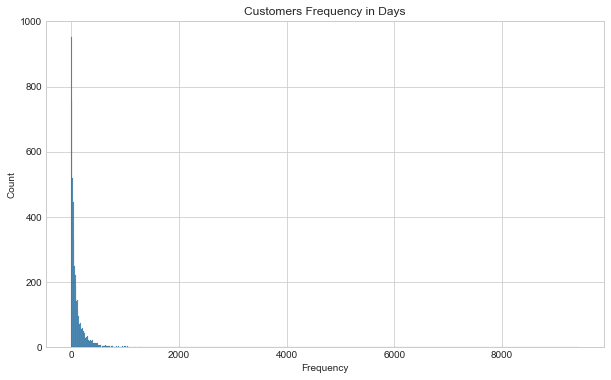

In [59]:
plt.figure(figsize = (10,6))
sns.histplot(x='Frequency',data=cus_df)
plt.title("Customers Frequency in Days");

In [60]:
kmeans = KMeans(n_clusters = number_of_clusters)
kmeans.fit(cus_df[['Frequency']])
cus_df['FrequencyCluster'] = kmeans.predict(cus_df[['Frequency']])

cus_df.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster
0,13085.0,9999.0,57,3,92,0
1,13078.0,13.0,0,3,744,2
2,18102.0,27.0,26,3,795,2
3,12682.0,15.0,0,3,872,2
4,18087.0,46.0,44,3,94,0


In [61]:
cus_df = order_cluster(cus_df, 'Frequency', 'FrequencyCluster', True)
cus_df.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster
0,13085.0,9999.0,57,3,92,0
1,18087.0,46.0,44,3,94,0
2,17519.0,116.0,33,3,208,0
3,12362.0,40.0,12,3,111,0
4,15712.0,38.0,9,3,155,0


In [62]:
#see details of each cluster
cus_df.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,4867.0,69.666530,72.272979,1.0,17.00,42.0,97.00,323.0
1,431.0,578.310905,265.226907,324.0,387.00,474.0,696.50,1759.0
2,14.0,3090.500000,1136.964904,1867.0,2359.25,2690.0,3608.75,5929.0
3,2.0,9000.500000,589.019949,8584.0,8792.25,9000.5,9208.75,9417.0


 higher frequency number means better customers.

## Revenue

In [63]:
cus_revenue = cus_past_df.groupby('CustomerID')['Revenue'].sum().reset_index()
cus_df = pd.merge(cus_df,cus_revenue,on='CustomerID')
cus_df.rename(columns={'Revenue':'TotalRevenue'},inplace=True)


cus_revenue_mean = cus_past_df.groupby('CustomerID')['Revenue'].mean().reset_index()
cus_df = pd.merge(cus_df,cus_revenue_mean,on='CustomerID')
cus_df.rename(columns={'Revenue':'MeanRevenue'},inplace =True)

cus_df.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,TotalRevenue,MeanRevenue
0,13085.0,9999.0,57,3,92,0,1459.46,15.863696
1,18087.0,46.0,44,3,94,0,13558.82,144.242766
2,17519.0,116.0,33,3,208,0,4746.78,22.821058
3,12362.0,40.0,12,3,111,0,1854.55,16.707658
4,15712.0,38.0,9,3,155,0,3161.41,20.396194


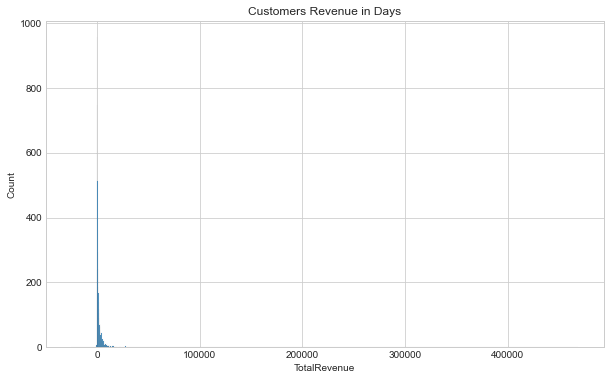

In [64]:
plt.figure(figsize = (10,6))
sns.histplot(x='TotalRevenue',data=cus_df)
plt.title("Customers Revenue in Days");

In [65]:
kmeans = KMeans(n_clusters = number_of_clusters)
kmeans.fit(cus_df[['TotalRevenue']])
cus_df['TotalRevenueCluster'] = kmeans.predict(cus_df[['TotalRevenue']])

cus_df.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,TotalRevenue,MeanRevenue,TotalRevenueCluster
0,13085.0,9999.0,57,3,92,0,1459.46,15.863696,0
1,18087.0,46.0,44,3,94,0,13558.82,144.242766,0
2,17519.0,116.0,33,3,208,0,4746.78,22.821058,0
3,12362.0,40.0,12,3,111,0,1854.55,16.707658,0
4,15712.0,38.0,9,3,155,0,3161.41,20.396194,0


In [66]:
# ordering cluster number
cus_df = order_cluster(cus_df, 'TotalRevenue', 'TotalRevenueCluster', True)
cus_df.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,TotalRevenue,MeanRevenue,TotalRevenueCluster
0,13085.0,9999.0,57,3,92,0,1459.46,15.863696,0
1,18087.0,46.0,44,3,94,0,13558.82,144.242766,0
2,17519.0,116.0,33,3,208,0,4746.78,22.821058,0
3,12362.0,40.0,12,3,111,0,1854.55,16.707658,0
4,15712.0,38.0,9,3,155,0,3161.41,20.396194,0


In [67]:
pd.DataFrame(cus_df.groupby('TotalRevenueCluster')['TotalRevenue'].describe())

,count,mean,std,min,25%,50%,75%,max
TotalRevenueCluster,,,,,,,,
0,5197.0,1549.664270,2222.556985,-25111.09,300.7600,728.82,1853.940,14140.76
1,104.0,26863.599356,14708.090925,14272.55,16391.0125,21528.25,31273.370,77252.39
2,11.0,139209.965455,54070.201992,86256.97,103416.7900,118491.74,155785.315,264500.02
3,2.0,444293.570000,35074.730804,419491.99,431892.7800,444293.57,456694.360,469095.15


## Overall Score

In [68]:
#calculate overall score and use mean() to see details

cus_df['OverallScore'] = cus_df['RecencyCluster'] + cus_df['FrequencyCluster'] + cus_df['TotalRevenueCluster']

cus_df.groupby('OverallScore')['Recency','Frequency','TotalRevenue'].mean()

,Recency,Frequency,TotalRevenue
OverallScore,,,
0,520.586898,24.469251,285.906594
1,314.889837,54.712154,802.571771
2,158.733209,76.388993,1342.999869
3,43.912940,111.240310,2107.846408
4,30.910769,533.015385,8131.287268
5,16.910448,810.447761,26960.150493
6,14.363636,2336.272727,82053.460909
7,11.000000,4183.000000,195263.282000
8,0.500000,5860.500000,310891.240000



The scoring above clearly shows us that customers with score 8 are our best customers whereas those who score 3 are the worst.

In [69]:
cus_df['Segment'] = 'low_value'
cus_df.loc[cus_df['OverallScore'] > 2, 'Segment'] = 'Mid-Value'
cus_df.loc[cus_df['OverallScore'] > 4, 'Segment'] = 'High-Value'

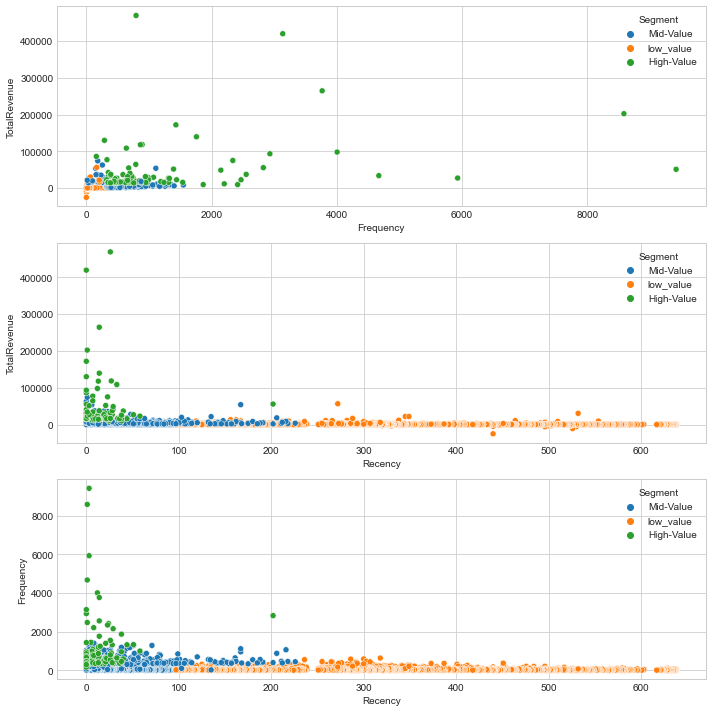

In [70]:
fig,axs = plt.subplots(nrows=3,ncols=1,figsize=(10,10))
sns.scatterplot(x='Frequency',y='TotalRevenue',data=cus_df,hue=cus_df['Segment'],ax=axs[0])
sns.scatterplot(x='Recency',y='TotalRevenue',data=cus_df,hue=cus_df['Segment'],ax=axs[1])
sns.scatterplot(x='Recency',y='Frequency',data=cus_df,hue=cus_df['Segment'],ax=axs[2])
plt.tight_layout()

In [71]:
cus_df.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,TotalRevenue,MeanRevenue,TotalRevenueCluster,OverallScore,Segment
0,13085.0,9999.0,57,3,92,0,1459.46,15.863696,0,3,Mid-Value
1,18087.0,46.0,44,3,94,0,13558.82,144.242766,0,3,Mid-Value
2,17519.0,116.0,33,3,208,0,4746.78,22.821058,0,3,Mid-Value
3,12362.0,40.0,12,3,111,0,1854.55,16.707658,0,3,Mid-Value
4,15712.0,38.0,9,3,155,0,3161.41,20.396194,0,3,Mid-Value


In [72]:
#create ctm_class as a copy of ctm_dt before applying get_dummies
cus_data = cus_df.copy()
cus_data = pd.get_dummies(cus_data)
cus_data.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,TotalRevenue,MeanRevenue,TotalRevenueCluster,OverallScore,Segment_High-Value,Segment_Mid-Value,Segment_low_value
0,13085.0,9999.0,57,3,92,0,1459.46,15.863696,0,3,0,1,0
1,18087.0,46.0,44,3,94,0,13558.82,144.242766,0,3,0,1,0
2,17519.0,116.0,33,3,208,0,4746.78,22.821058,0,3,0,1,0
3,12362.0,40.0,12,3,111,0,1854.55,16.707658,0,3,0,1,0
4,15712.0,38.0,9,3,155,0,3161.41,20.396194,0,3,0,1,0


In [73]:
cus_data['NextPurchaseDay'].describe()

count    5314.000000
mean     5614.388408
std      4893.694783
min         0.000000
25%       124.250000
50%      9999.000000
75%      9999.000000
max      9999.000000
Name: NextPurchaseDay, dtype: float64

Since our goal is to estimate whether a customer will make a purchase in the next quarter, we will create a new column NextPurchaseDayRange
defined as follows:

* 0–20: Customers that will purchase in 0–20 days — Class name: 2
* 21–49: Customers that will purchase in 21–49 days — Class name: 1
* ≥ 50: Customers that will purchase in more than 50 days — Class name: 0

### Creating target variables

In [74]:
# customer purchase day range
cus_data['NextPurchaseDayRange'] = 2
cus_data.loc[cus_data.NextPurchaseDay>20,'NextPurchaseDayRange'] = 1
cus_data.loc[cus_data.NextPurchaseDay>50,'NextPurchaseDayRange'] = 0

__Checking the correletion between the features and labels__

In [75]:
cus_data

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,TotalRevenue,MeanRevenue,TotalRevenueCluster,OverallScore,Segment_High-Value,Segment_Mid-Value,Segment_low_value,NextPurchaseDayRange
0,13085.0,9999.0,57,3,92,0,1459.46,15.863696,0,3,0,1,0,0
1,18087.0,46.0,44,3,94,0,13558.82,144.242766,0,3,0,1,0,1
2,17519.0,116.0,33,3,208,0,4746.78,22.821058,0,3,0,1,0,0
3,12362.0,40.0,12,3,111,0,1854.55,16.707658,0,3,0,1,0,1
4,15712.0,38.0,9,3,155,0,3161.41,20.396194,0,3,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5309,14156.0,17.0,14,3,3766,2,264500.02,70.233675,2,7,1,0,0,2
5310,13089.0,0.0,0,3,2932,2,93431.46,31.866119,2,7,1,0,0,2
5311,14911.0,2.0,1,3,8584,3,202290.49,23.565994,2,8,1,0,0,2
5312,18102.0,27.0,26,3,795,1,469095.15,590.056792,3,7,1,0,0,1


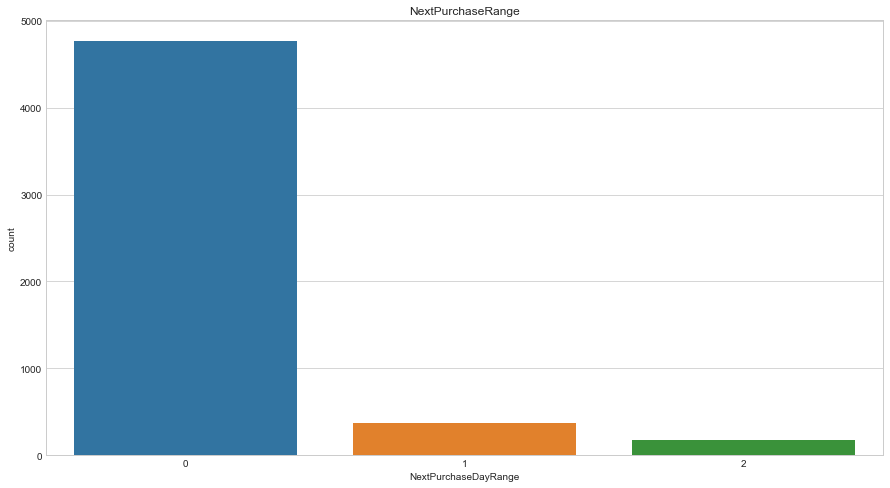

In [76]:
# plot t
plt.figure(figsize=(15,8))
sns.countplot(data=cus_data,x='NextPurchaseDayRange')
plt.title('NextPurchaseRange');

__Dataset is very imbalance__

In [77]:
corr = cus_data.corr()

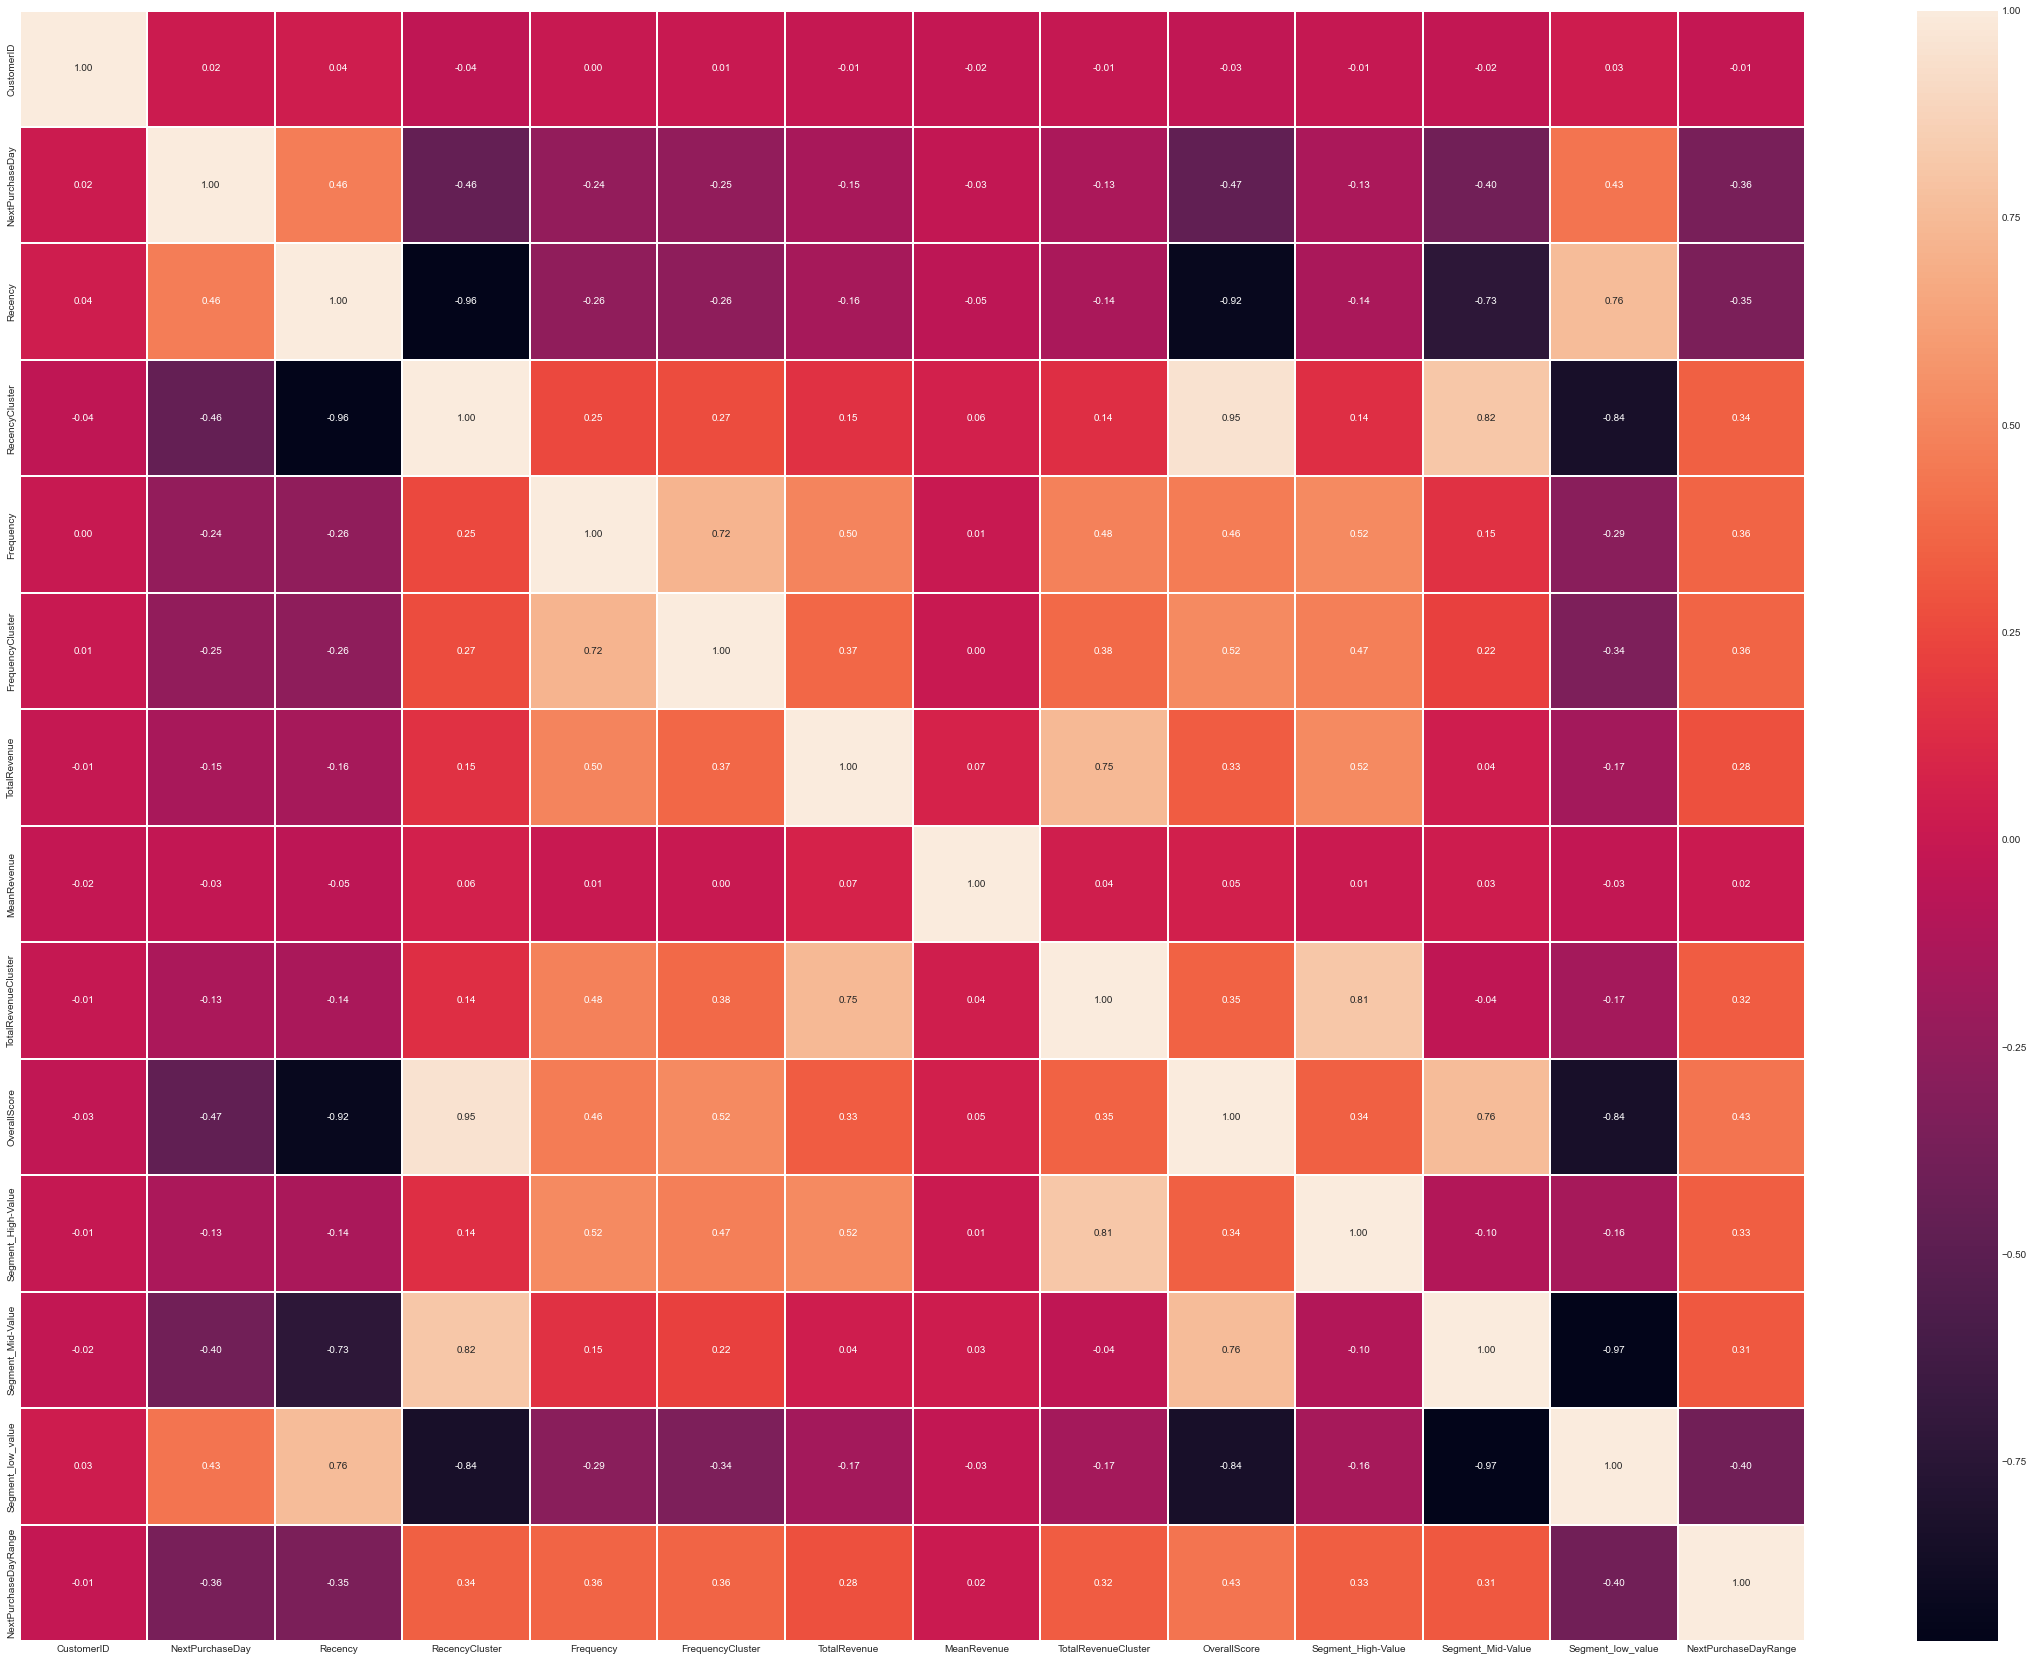

In [78]:
plt.figure(figsize=(40,30))
sns.heatmap(corr,annot = True,fmt='.2F',linewidth = 0.2);

## Building Machine Learning Model

In [79]:
# dropping nextpurchaseday
cus_data.drop('NextPurchaseDay',axis = 1,inplace = True)

In [80]:
# splitting data for classification and regression

x = cus_data.drop('NextPurchaseDayRange',axis = 1)
y = cus_data['NextPurchaseDayRange']

# removing imbalance in the dataset
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='not majority')
x_over,y_over = ros.fit_resample(x,y)

In [81]:
y_over.value_counts()

0    4765
1    4765
2    4765
Name: NextPurchaseDayRange, dtype: int64

In [82]:
# instantiating models

models = {
    "LogisticRegression" : LogisticRegression(),
    "GaussianNB" : GaussianNB(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "SVC" : SVC(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "xgb.XGBClassifier" : xgb.XGBClassifier(eval_metric='mlogloss'),
    "KNeighborsClassifier" : KNeighborsClassifier()
}


In [83]:
class_scorer = ['accuracy']

In [84]:
# function to perform cross validation on all metrics and display them for each model
def fit_and_score(model,x,y,scorer):
        metric =[]
        index = []
        kfold = KFold(n_splits=2, random_state=24, shuffle=True)
        for key,value in model.items() :
            index.append(key)
            for i in range(len(scorer)) :
                score = cross_val_score(value,x,y,scoring = scorer[i],cv = kfold)
                score = np.mean(score)
                metric.append(score)
        df = pd.DataFrame(np.array(metric).reshape(len(model),len(scorer)))
        df.columns = scorer
        df.index = index
        return df  

In [85]:
# performing cross_validation for the classification
class_metrics = fit_and_score(model=models,scorer=class_scorer,y=y_over,x=x_over)

class_metrics

,accuracy
LogisticRegression,0.743896
GaussianNB,0.662749
RandomForestClassifier,0.969850
SVC,0.554879
DecisionTreeClassifier,0.975586
xgb.XGBClassifier,0.970270
KNeighborsClassifier,0.914866


__The `randomforestclassifier`performed better

## Next Days spend Propability

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2)

In [87]:
# instantiating model and fitting
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [88]:
# making prediction probalities
prediction_proba = rf.predict_proba(x_test)

# predictions
preds = rf.predict(x_test)

## Classfication Report

In [89]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       874
           1       1.00      0.96      0.98       992
           2       1.00      0.99      0.99       993

    accuracy                           0.98      2859
   macro avg       0.98      0.98      0.98      2859
weighted avg       0.98      0.98      0.98      2859



In [90]:
## Savving model
from joblib import dump
dump(rf, 'C:/Users/user/Data_Driven/models/Customer_next_purchase_day_model.joblib_1')

['C:/Users/user/Data_Driven/models/Customer_next_purchase_day_model.joblib_1']